# PCA of Iris dataset Manually

In [2]:
#importing required libraries
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sn;

In [5]:
#load iris dataset
iris = pd.read_csv('./iris.csv');

print(iris.head(3));

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa


In [6]:
#remove Id column
iris = iris.drop('Id', axis=1);
print('columns present in iris: ', iris.columns)

#no of datapoints in iris:
print(iris.shape)

columns present in iris:  Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
(150, 5)


In [7]:
#seperating class label and features
label = iris.Species;

iris = iris.drop(columns=['Species']);

print(iris.head(3));

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2


In [12]:
#perfom standaridization on iris data.
from sklearn.preprocessing import StandardScaler;

std_iris = StandardScaler().fit_transform(iris);

print('shape of standardized iris: ', std_iris.shape);


shape of standardized iris:  (150, 4)


In [14]:
#finding co-variance matrix:
covar_mat = np.matmul( std_iris.T, std_iris );
print('shape of covriance matrix: ',covar_mat.shape);
print('obtained covariance matrix: ');
print(covar_mat)

shape of covriance matrix:  (4, 4)
obtained covariance matrix: 
[[150.         -16.40538749 130.7631236  122.69304501]
 [-16.40538749 150.         -63.07741446 -53.48161344]
 [130.7631236  -63.07741446 150.         144.41356456]
 [122.69304501 -53.48161344 144.41356456 150.        ]]


In [22]:
#generating top 2 eigen values and eigen vectors
from scipy.linalg import eigh;

values, vectors = eigh(covar_mat, eigvals=(2, 3));
print('shape of eigen vectors ', vectors.shape);
print('obtained eigen vectors: ', vectors);
print('obtained eigen values: ', values)

#performing transponse of vectors to bring vector on row 
vectors = vectors.T
print('new shape of eigen vectors: ', vectors.shape)

shape of eigen vectors  (4, 2)
obtained eigen vectors:  [[-0.37231836  0.52237162]
 [-0.92555649 -0.26335492]
 [-0.02109478  0.58125401]
 [-0.06541577  0.56561105]]
obtained eigen values:  [138.18313961 436.62271256]
new shape of eigen vectors:  (2, 4)


In [29]:
#generating new components:
new_coord = np.matmul(vectors, std_iris.T).T;
print('Shape of our new dataset obtained from generated 2 components: ', new_coord.shape);

#concat labels with new vector's dataset.
new_coord = np.vstack((new_coord.T, label)).T;
print('Shape after concating Species to dataset: ', new_coord.shape);

#get dataframe of new dataset
iris_df = pd.DataFrame(data=new_coord, columns=['component_1', 'component_2', 'Species']);
print('generated dataframe: ');
print(iris_df.head(3));

Shape of our new dataset obtained from generated 2 components:  (150, 2)
Shape after concating Species to dataset:  (150, 3)
generated dataframe: 
  component_1 component_2      Species
0   -0.505704    -2.26454  Iris-setosa
1    0.655405    -2.08643  Iris-setosa
2    0.318477    -2.36795  Iris-setosa


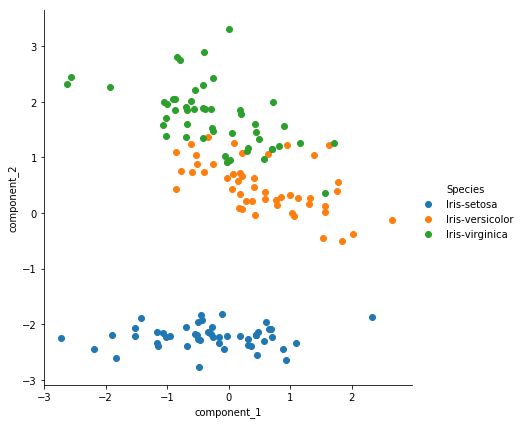

In [30]:
#plotting new dataset.
sn.FacetGrid(iris_df, hue='Species', height=6)\
    .map(plt.scatter, 'component_1', 'component_2')\
    .add_legend();
plt.show()

# PCA of iris dataset using sklearn

In [31]:
#importing decompositon from sklearn in which PCA is present.
from sklearn import decomposition;

pca = decomposition.PCA();

In [32]:
#configuring PCA for number of components:
pca.n_components = 2;

#generating new data-matrix with new features.
pca_data = pca.fit_transform(std_iris);
print('shape of new data-matrix: ', pca_data.shape)

shape of new data-matrix:  (150, 2)


In [33]:
#concating Species with new data-matrix;
pca_data = np.vstack((pca_data.T, label)).T

#obtaining data frame from obtained dataset
iris_df = pd.DataFrame(data=pca_data, columns=['component_1', 'component_2', 'Species']);
print('new data frame: ');
print(iris_df.head(3))

new data frame: 
  component_1 component_2      Species
0    -2.26454    0.505704  Iris-setosa
1    -2.08643   -0.655405  Iris-setosa
2    -2.36795   -0.318477  Iris-setosa


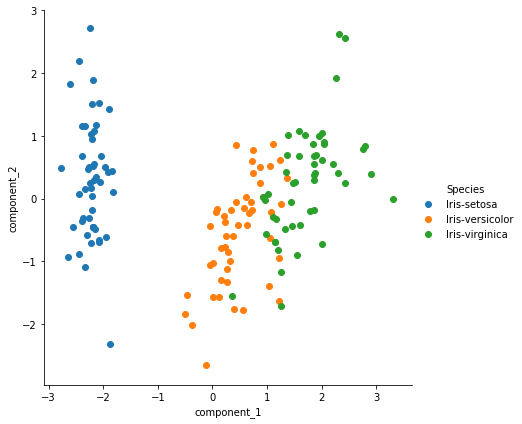

In [34]:
#plotting new dataframe
sn.FacetGrid(iris_df, hue='Species', height=6)\
    .map(plt.scatter, 'component_1', 'component_2')\
    .add_legend();
plt.show();

# PCA for determining no of new components to use.

shape of obtained dataset  (150, 4)


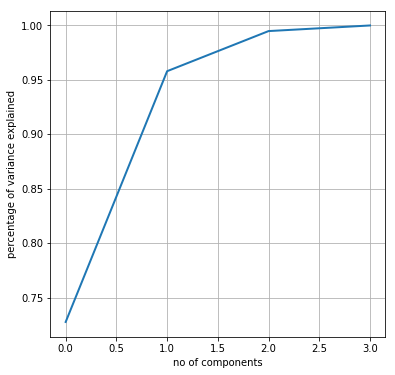

In [37]:
#configuring PCA for number of components
pca.n_components = 4;

#obtaining new dataset with new vectors:
pca_data = pca.fit_transform(std_iris);
print('shape of obtained dataset ', pca_data.shape)

#calculating percentage variance explained for each new feature/component;
percentage_var_explained = pca.explained_variance_ / sum( pca.explained_variance_ )

#finding cumumulative sum of percentage variance explained
cum_var_explained = np.cumsum(percentage_var_explained);

#plotting cummulative sum to determine how many new components to generate.
plt.figure(1, figsize=(6, 6));
plt.plot(cum_var_explained, linewidth=2);
plt.grid();
plt.xlabel('no of components');
plt.ylabel('percentage of variance explained');
plt.show();

## Observations:
* we get 40% of var explained for one component.
* we get 96% of var explained for two components.
* we get 99% of var explained for three components.
* we get 100% of var explained for four components.